In [203]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as sm

# Load data

In [204]:
df = pd.read_csv("insurance.csv")

In [205]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Preprossing the data

* ## Check out the Missing Values

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* ## transform categorical data

In [207]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [208]:
lb_sex = LabelEncoder()
lb_smoker = LabelEncoder()
lb_region = LabelEncoder()

df['sex_encoded'] = lb_sex.fit_transform(df.sex)
df['smoker_encoded'] = lb_smoker.fit_transform(df.smoker)
df['region_encoded'] = lb_region.fit_transform(df.region)

ohe_region = OneHotEncoder()
# One hot encoding (OHE) to array--
arr_ohe_region = ohe_region.fit_transform(data.region_encoded.values.reshape(-1,1)).toarray()


In [209]:
# Convert array OHE to dataframe and append to existing dataframe--
dfOneHot = pd.DataFrame(arr_ohe_region, columns=['region_'+str(i) for i in range(arr_ohe_region.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)
df_pre = df.drop(['sex','smoker','region','region_encoded','region_0'], axis=1)

In [210]:
df_pre.head()

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_1,region_2,region_3
0,19,27.900,0,16884.92400,0,1,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1,0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1,0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1,0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1,0,1.0,0.0,0.0


* ## feature scaling


In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
standard_x = StandardScaler()
x_train = standard_x.fit_transform(df_pre)
x_test = standard_x.fit_transform(df_pre)
#After Feature Scaling all values comes into same scale
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   bmi             1338 non-null   float64
 2   children        1338 non-null   int64  
 3   charges         1338 non-null   float64
 4   sex_encoded     1338 non-null   int32  
 5   smoker_encoded  1338 non-null   int32  
 6   region_1        1338 non-null   float64
 7   region_2        1338 non-null   float64
 8   region_3        1338 non-null   float64
dtypes: float64(5), int32(2), int64(2)
memory usage: 83.8 KB


# Seprating the Data & Label


In [213]:
variables = ['age','sex_encoded','bmi','children','smoker_encoded','region_1','region_2','region_3']

X = df_pre[variables]
Y = data['charges']

sc = StandardScaler()
X = sc.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

# Apply Models

* ## Apply Decision Tree Regressor Model


In [214]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=10,random_state=33)
DecisionTreeRegressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, random_state=33)

In [215]:
print('Linear Regression Train Score is : ' , DecisionTreeRegressor.score(X_train, y_train))
print('Linear Regression Test Score is : ' , DecisionTreeRegressor.score(X_test, y_test))

Linear Regression Train Score is :  0.9730420091296879
Linear Regression Test Score is :  0.7046938656736844


In [216]:
#Calculating Prediction
y_pred = DecisionTreeRegressor.predict(X_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:5])
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_test[:5])

Predicted Value for DecisionTreeRegressorModel is :  [ 5643.99698345  1724.50967778  8351.64114333 19444.2658
  1898.16990625]
Predicted Value for DecisionTreeRegressorModel is :  440      4738.26820
1202     2055.32490
820      7445.91800
730     19361.99880
78       2755.02095
Name: charges, dtype: float64


In [217]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  3120.7238640506775
Mean Squared Error Value is :  38863863.781351484
Median Squared Error Value is :  550.769365000001


* ## Applying Linear Regression Model 


In [218]:
from sklearn.linear_model import LinearRegression
LinearRegressionModel=LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train , y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [219]:
#Calculating Details
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))

Linear Regression Train Score is :  0.7498624222445878
Linear Regression Test Score is :  0.754612738494679


In [220]:
#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:5])
print('Predicted Value for Linear Regression is : ' , y_test[:5])

Predicted Value for Linear Regression is :  [ 7336.33461014  4113.32527721 10321.58907777 29595.12579574
  7299.85587915]
Predicted Value for Linear Regression is :  440      4738.26820
1202     2055.32490
820      7445.91800
730     19361.99880
78       2755.02095
Name: charges, dtype: float64


In [221]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)

MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  4031.671697619286
Mean Squared Error Value is :  32294273.624142006
Median Squared Error Value is :  2480.184319144254


* ## Apply ExtraTreesRegressor


In [222]:
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor(n_estimators = 200)
regressor.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=200)

In [223]:
#Calculating Details
print('ExtraTreesRegressorModel Train Score is : ' , regressor.score(X_train, y_train))
print('ExtraTreesRegressorModel Test Score is : ' , regressor.score(X_test, y_test))

ExtraTreesRegressorModel Train Score is :  0.9983742332704377
ExtraTreesRegressorModel Test Score is :  0.807725207881377


In [224]:
#prediction and evaluation
y_pred = regressor.predict(X_test)
print('Predicted Value for ExtraTreesRegressor is : ' , y_pred[:5])
print('Predicted Value for ExtraTreesRegressor is : ' , y_test[:5])

Predicted Value for ExtraTreesRegressor is :  [ 4582.772611    2938.95648785  7493.0564925  19021.3838692
  3479.8276634 ]
Predicted Value for ExtraTreesRegressor is :  440      4738.26820
1202     2055.32490
820      7445.91800
730     19361.99880
78       2755.02095
Name: charges, dtype: float64


In [225]:
#Calculating Mean Absolute Error

MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)

MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )


Mean Absolute Error Value is :  2607.969020715991
Mean Squared Error Value is :  25304389.109738644
Median Squared Error Value is :  641.1328224000008


* ## Apply Knn model


In [226]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 10 , weights ='distance' ,p=2, metric='minkowski')
y_pred = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) 

In [227]:
#Calculating Details
print('KNeighborsRegressorModel Train Score is : ' , knn.score(X_train, y_train))
print('KNeighborsRegressorModel Test Score is : ' , knn.score(X_test, y_test))

KNeighborsRegressorModel Train Score is :  0.9983742332704377
KNeighborsRegressorModel Test Score is :  0.8094535885580901


In [228]:
print('Predicted Value for Knn is : ' , y_pred[:5])
print('Predicted Value for Knn is : ' , y_test[:5])

Predicted Value for Knn is :  [ 4476.40600515  3614.49941016  8076.82482832 22957.88041439
  6004.68039674]
Predicted Value for Knn is :  440      4738.26820
1202     2055.32490
820      7445.91800
730     19361.99880
78       2755.02095
Name: charges, dtype: float64


In [229]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)

MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  2988.887736677658
Mean Squared Error Value is :  25076924.985651493
Median Squared Error Value is :  1540.5541995143096


# Comparing Models


In [230]:
models = [DecisionTreeRegressorModel , LinearRegressionModel , regressor , knn]
x=0
for m in models:
    x+=1
    
    for n in range(2,5):
        print('result of model number : ' , x ,' for cv value ',n,' is ' , cross_val_score(m, X, Y, cv=n))  
        print('-----------------------------------')

    print('=====================================')

result of model number :  1  for cv value  2  is  [0.68324824 0.71854787]
-----------------------------------
result of model number :  1  for cv value  3  is  [0.72260653 0.73548673 0.71549595]
-----------------------------------
result of model number :  1  for cv value  4  is  [0.78521086 0.65247224 0.74481609 0.75823642]
-----------------------------------
result of model number :  2  for cv value  2  is  [0.74606235 0.75130387]
-----------------------------------
result of model number :  2  for cv value  3  is  [0.74927063 0.7551822  0.7282883 ]
-----------------------------------
result of model number :  2  for cv value  4  is  [0.7717616  0.71032376 0.76732711 0.73473688]
-----------------------------------
result of model number :  3  for cv value  2  is  [0.81089719 0.81118432]
-----------------------------------
result of model number :  3  for cv value  3  is  [0.82112071 0.8196592  0.79173729]
-----------------------------------
result of model number :  3  for cv value  

* ## Visualization the features

Data distribution analysys


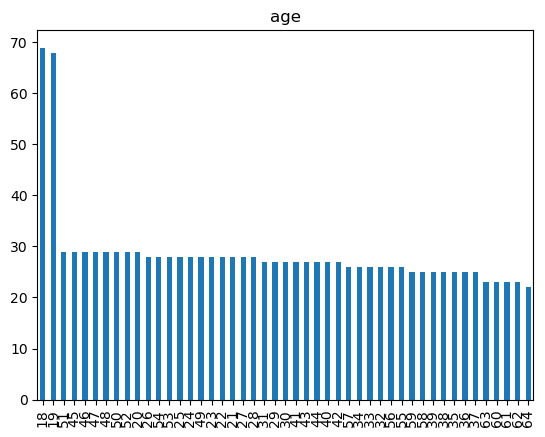

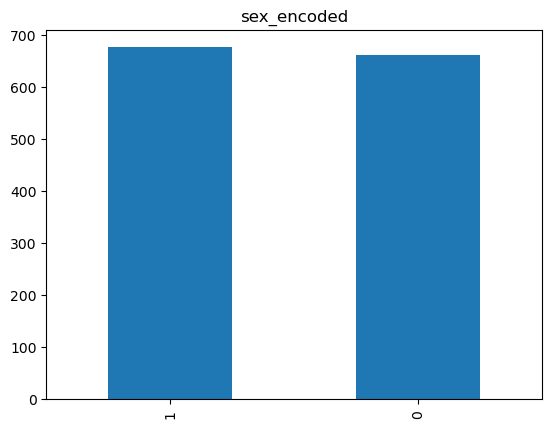

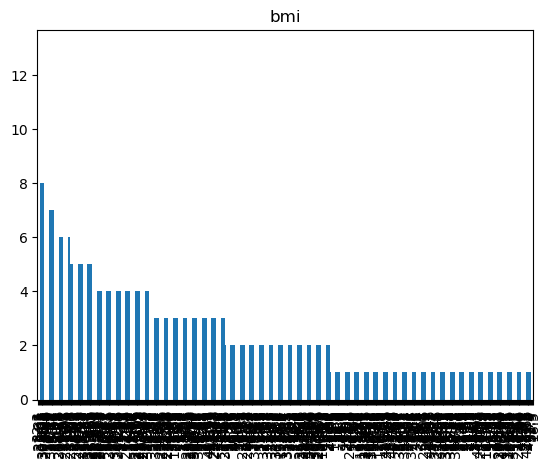

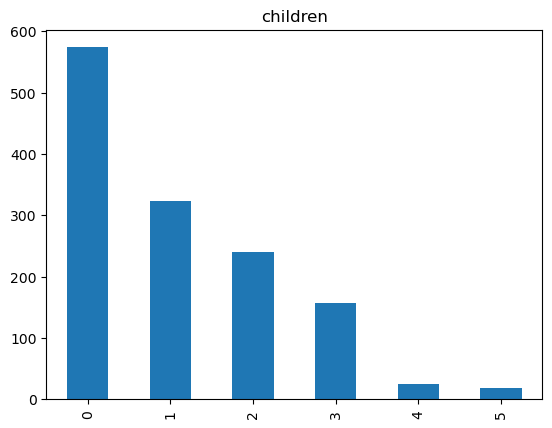

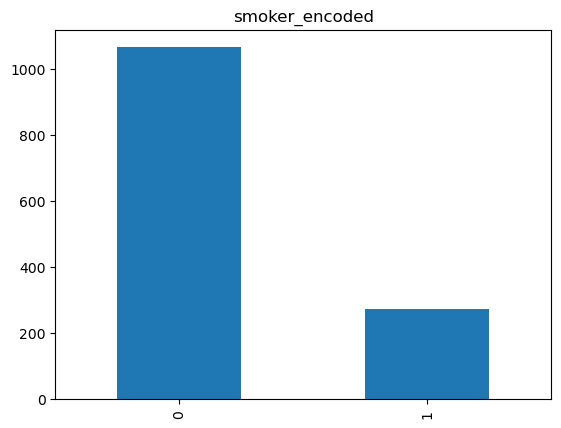

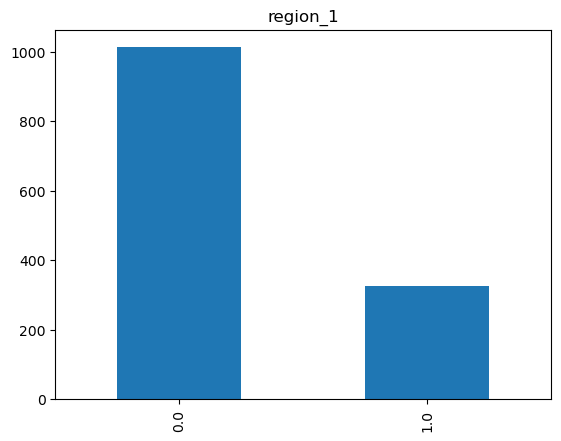

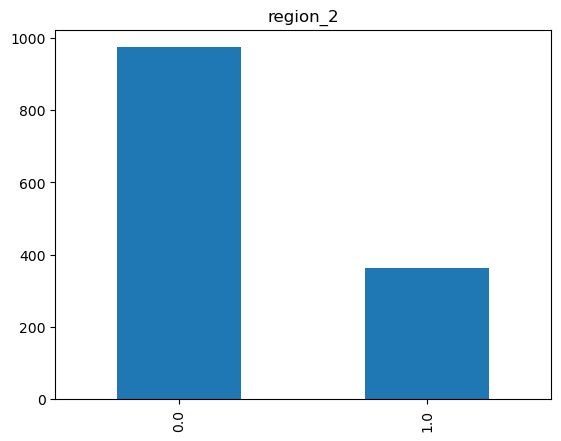

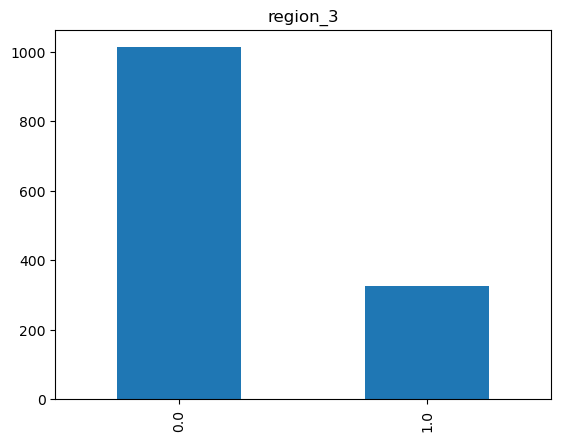

In [231]:
df_pre['bmi_int'] = df_pre['bmi'].apply(lambda x: int(x))

# data distribution analysys
print('Data distribution analysys')
for v in variables:
    df_pre = df_pre.sort_values(by=[v])
    df_pre[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

